# MNIST Digit Classification with TensorFlow and Keras

## 1. Importing Libraries and Loading Data

In this section, we import the necessary libraries and load the MNIST dataset using TensorFlow/Keras.

In [2]:

import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow/Keras
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


## 2. Defining the CNN Model

Here we define a Convolutional Neural Network (CNN) model using Keras.

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


d:\MNIST Classification Numpy vs TensorFlow\neural_network\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Defining Learning Rate Scheduler

We define a learning rate scheduler to adjust the learning rate during training.

In [4]:

def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.9
    return lr

lr_scheduler = LearningRateScheduler(scheduler)


## 4. Training the Model

Now we train the model on the MNIST dataset.

In [5]:

# Fit the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, callbacks=[lr_scheduler], validation_split=0.1)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8646 - loss: 0.4686 - val_accuracy: 0.9827 - val_loss: 0.0607 - learning_rate: 0.0010
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9706 - loss: 0.0985 - val_accuracy: 0.9868 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9802 - loss: 0.0686 - val_accuracy: 0.9912 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9823 - loss: 0.0594 - val_accuracy: 0.9900 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9853 - loss: 0.0485 - val_accuracy: 0.9913 - val_loss: 0.0380 - learning_rate: 0.0010
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9910 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9891 - l

## 5. Evaluating the Model

Here we evaluate the trained model on the test set.

In [6]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0335
Test loss: 0.0283063817769289
Test accuracy: 0.992900013923645


## 6. Defining a Function for Image Prediction

We define a function to load, preprocess, and predict digits from custom images.

In [7]:

from PIL import Image

def predict_digit(image_path):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Normalize the image
    img_array = img_array.astype('float32') / 255
    
    # Reshape to fit model input
    img_array = img_array.reshape((1, 28, 28, 1))
    
    # Predict digit
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction, axis=1)[0]
    
    return predicted_class, confidence


## 7. Testing the Model with a New Image

Finally, we test our model by predicting the digit in a custom image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Digit: 7
Confidence: 1.0000


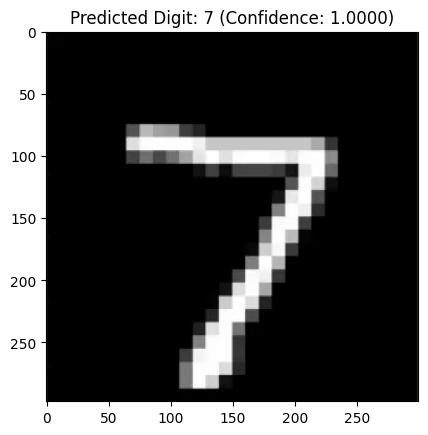

In [8]:

import matplotlib.pyplot as plt

# Test with a new image
image_path = 'sample_image-300x298.webp'  # Replace with your image path
predicted_digit, confidence = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")
print(f"Confidence: {confidence:.4f}")

# Display the image
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit} (Confidence: {confidence:.4f})')
plt.show()
